In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import permutations
%matplotlib inline
plt.style.use("ggplot")

In [2]:
os.chdir("/Users/imac/Desktop/Artem/")
data = pd.read_csv("avito_trend.csv")

In [3]:
data.head()

,ID,address,used_at,active_seconds,pageviews
0,bcb0cc3d7f01dc6297f1331362a0fc09,avito.ru,2014-03-17 00:24:47,148,3
1,bcb0cc3d7f01dc6297f1331362a0fc09,avito.ru,2014-03-17 01:08:29,34,4
2,bcb0cc3d7f01dc6297f1331362a0fc09,avito.ru,2014-05-02 17:47:39,22,1
3,bcb0cc3d7f01dc6297f1331362a0fc09,avito.ru,2015-01-03 01:37:05,224,5
4,bcb0cc3d7f01dc6297f1331362a0fc09,e1.ru,2015-01-11 03:49:50,54,1


In [4]:
print("There are {} users' visits in dataframe".format(data.shape[0]))

There are 498429 users' visits in dataframe


In [5]:
# Convert "used_at" column to datetime format: 
data.used_at = pd.to_datetime(data.used_at)

It is clear that dataframe is unsorted. Let's do this and also separate dataframe into 2014 and 2015 dataframes:

In [6]:
data = data.sort_values(['used_at'])
data_2014 = data[data.used_at <= "2014-12-31"]
data_2015 = data[data.used_at >= "2015-01-01"]

There is a point to check if any NaN or zero values are into data. Hopefully, the dataset doesn't contain these values:

In [7]:
data.isnull().sum()

ID                0
address           0
used_at           0
active_seconds    0
pageviews         0
dtype: int64

#### Some general statistics to understand nature of the dataset.

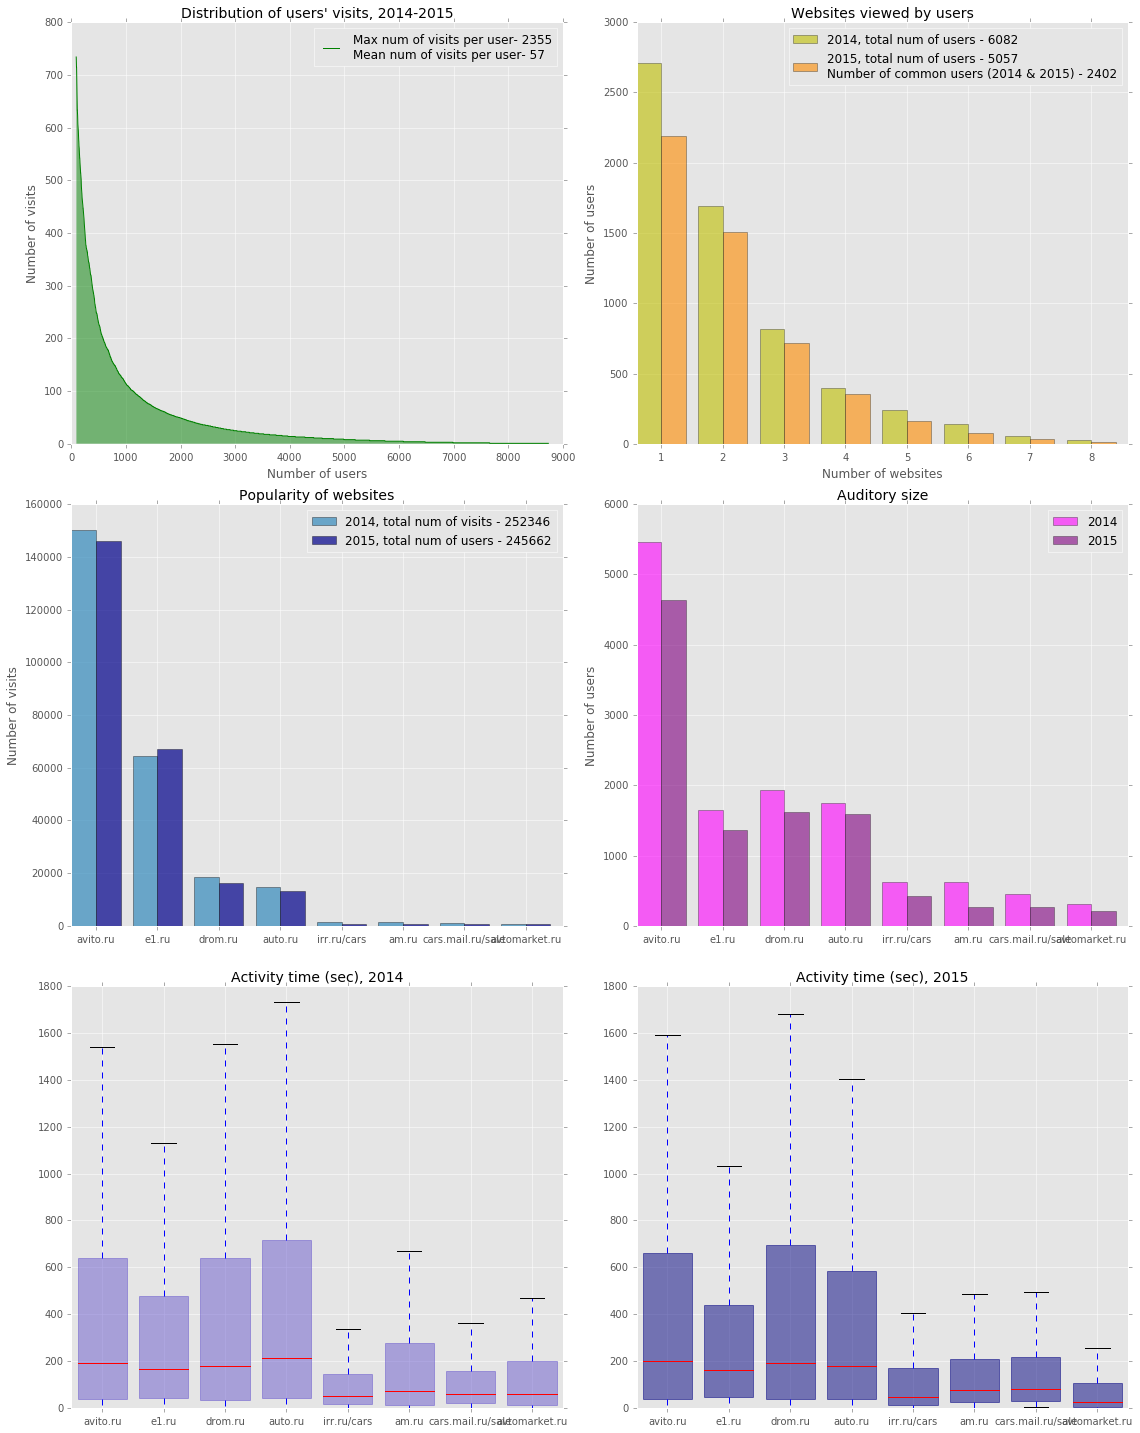

In [8]:
plt.figure(figsize=(16,20))
fs_titles = 14
fs_labels = 10

plt.subplot(3,2,1)
ind = int(data.ID.value_counts().shape[0] / 100 * 1)
X = np.arange(data.ID.value_counts().shape[0])
y = np.array(sorted(data.ID.value_counts(), reverse=True))
plt.plot(X[ind:], y[ind:], 'g')
plt.fill_between(X[ind:], 0, y[ind:], facecolor='green', alpha=0.5)
plt.legend(["Max num of visits per user- " + str(max(y)) + "\n" + "Mean num of visits per user- " + str(int(y.mean()))])
plt.title("Distribution of users' visits, 2014-2015", fontsize=fs_titles)
plt.xlabel("Number of users")
plt.ylabel("Number of visits")

plt.subplot(3,2,2)
X = np.arange(data.groupby('ID').address.nunique().value_counts().shape[0])
y_2014 = data_2014.groupby('ID').address.nunique().value_counts()
y_2015 = data_2015.groupby('ID').address.nunique().value_counts()
plt.bar(X, y_2014, alpha = 0.6, facecolor = 'y', edgecolor = 'k', width=0.4)
plt.bar(X + 0.4, y_2015, alpha = 0.6, facecolor = 'darkorange', edgecolor = 'k', width =0.4)
plt.xticks(X + 0.4, X + 1)
plt.legend(["2014, total num of users - " + str(y_2014.sum()), "2015, total num of users - " + str(y_2015.sum()) + \
           '\n' + "Number of common users (2014 & 2015) - " + str((data_2014.groupby('ID').ID.nunique() & data_2015.groupby('ID').ID.nunique()).sum())])
plt.title("Websites viewed by users", fontsize=fs_titles)
plt.xlabel("Number of websites")
plt.ylabel("Number of users")

plt.subplot(3,2,3)
X = np.arange(data.address.value_counts().shape[0])
y_2014 = data_2014.address.value_counts()
y_2015 = data_2015.address.value_counts()
plt.bar(X, y_2014, alpha = 0.7, edgecolor='k', width=0.4)
plt.text
plt.bar(X + 0.4, y_2015, alpha = 0.7, edgecolor='k', facecolor='darkblue', width=0.4)
plt.xticks(X + 0.4, data.address.value_counts().index, fontsize = fs_labels)
plt.legend(["2014, total num of visits - " + str(y_2014.sum()), "2015, total num of users - " + str(y_2015.sum())])
plt.title("Popularity of websites", fontsize=fs_titles)
plt.ylabel("Number of visits")

plt.subplot(3,2,4)
X = np.arange(data.groupby('address').ID.nunique().shape[0])
y_2014 = data_2014.groupby('address').ID.nunique().reindex(data.address.value_counts().index)
y_2015 = data_2015.groupby('address').ID.nunique().reindex(data.address.value_counts().index)
plt.bar(X, y_2014, alpha = 0.6, facecolor='magenta', edgecolor='k', width=0.4)
plt.bar(X + 0.4, y_2015, alpha = 0.6, facecolor='purple', edgecolor='k', width=0.4)
plt.xticks(X + 0.4, data.address.value_counts().index, fontsize = fs_labels)
plt.legend(["2014", "2015"])
plt.title("Auditory size", fontsize=fs_titles)
plt.ylabel("Number of users")

plt.subplot(3,2,5)
bp_data_2014 = []
for website in data.address.value_counts().index:
    bp_data_2014.append(data_2014.loc[data_2014.address == website, 'active_seconds'])
bp = plt.boxplot(bp_data_2014, showfliers=False, 
            labels=data.address.value_counts().index, widths=0.8, patch_artist = True)
plt.setp(bp['boxes'], color ='slateblue', alpha = 0.5)
plt.title("Activity time (sec), 2014", fontsize=fs_titles)

plt.subplot(3,2,6)
bp_data_2015 = []
for website in data.address.value_counts().index:
    bp_data_2015.append(data_2015.loc[data_2015.address == website, 'active_seconds'])
bp = plt.boxplot(bp_data_2015, showfliers=False, 
            labels=data.address.value_counts().index, widths=0.8, patch_artist = True)
plt.setp(bp['boxes'], color ='navy', alpha = 0.5)
plt.title("Activity time (sec), 2015", fontsize=fs_titles)

plt.tight_layout()

Few **conclusions** about data are to be made:
* Visits' distribution is far away from uniform. There is a bunch of users who have made **substantionally** more visits than others. Thus the average num of visits is much less than maximum number of visits. Probably the distribution of visits has power-law nature
* There are more users in 2014 (6082 in 2014 vs. 5057 in 2015). The common users are only 2402 people in total, which is less than 50%. Some caution is needed to be sure that both groups of respondents are from representative samples.
* Majority of respondents uses 1-2 websites only. 
* There are 4 out 8 websites which are obvious leaders in terms of number of visits and auditory size. The year does not make any difference
* Top websites also have larger median activity time. 

#### Cross-usage. 

The goal is to visualize cross-usage, i.e. how users move from one resource to another. So, there is no point to hold "loyal" users in dataset - those who visited only 1 website since there is no cross-usage. 

In [9]:
def create_crs_usage_data(data):
    ind = (data.groupby('ID').address.nunique() > 1).values
    IDs_crs_usage = data.groupby('ID').address.nunique().index[ind]

    # Data with users who visit > 1 website:
    data_crs_usage = data[data.ID.isin(IDs_crs_usage)]
    print("There are {} users' visits in dataframe".format(data_crs_usage.shape[0]))
    return data_crs_usage

In [10]:
data_2014_crs_usage = create_crs_usage_data(data_2014)
data_2015_crs_usage = create_crs_usage_data(data_2015)

There are 215563 users' visits in dataframe
There are 217283 users' visits in dataframe


Let's make several assumptions for simplification:
* we are interested in **one-year time intervals** only, i.e. if the user goes to website **A** in Jan'2014 and then next time goes to website **B** in Dec'2014 it is still considered cross-usage behaviour
* only **"chains" of moves with length == 2** are counted, i.e. we do not analyze long chains, for example, when visitor goes to A, then to B, then to C and thus the inference that user came to website C from A is not made. The answer is the following - user came to B from A, and to C from B. 

In [11]:
# Put all websites in list:
urls = list(data.address.value_counts().index)
    
def count_moves(data):
    
    # All combinations of users' moves from one website to another (which is n*(n-1), where n is num of websites):
    options_crs_usage = [x for x in permutations(urls, 2)]

    # Create dictionary to count all users' moves
    values_crs_usage = dict(zip(options_crs_usage, [0] * len(options_crs_usage)))
    
    # Set indices of dataframe to start from zero: 
    data.index = range(data.shape[0])
    
    # Count all users' moves and put values into dictionary:
    for ind in range(data.shape[0] - 1):
        user_move = (data.ix[ind, 'address'], data.ix[ind + 1, 'address'])
        if user_move in options_crs_usage:
            values_crs_usage[user_move] += 1
    total_moves = sum(values_crs_usage.values())
    print ("There are {} moves in total in dataset".format(total_moves))
    return values_crs_usage

The number of moves for 2014 and 2015 is almost the same - the values for 2014/2015 can be compared without normalization, i.e. **absolute** values are quite appropriate:

In [12]:
crs_usage_2014 = count_moves(data_2014_crs_usage)
crs_usage_2015 = count_moves(data_2015_crs_usage)

There are 131412 moves in total in dataset
There are 129882 moves in total in dataset


It is interesting to look at the **"saldo" values** of various websites, i.e. the absolute difference between incoming and outcoming moves:

In [13]:
saldo_2014 = np.array([crs_usage_2014[key[0],key[1]] - crs_usage_2014[key[1],key[0]] for key in crs_usage_2014.keys()])
saldo_2015 = np.array([crs_usage_2015[key[0],key[1]] - crs_usage_2015[key[1],key[0]] for key in crs_usage_2015.keys()])
print("The absolute saldo is {}".format(max(abs(saldo_2014))))
print("The absolute saldo is {}".format(max(abs(saldo_2015))))

The absolute saldo is 56
The absolute saldo is 64


In fact, the difference between incoming and outcoming visits is tiny! Moreover, some combinations of moves have really small values. 

It makes possible to go further with few assumptions:
* Let's take under consideration only connections with values >= 100, i.e. **at least 100 moves**:
* Let's abstract away from "incoming" and "outcoming" definitions and **consider single connection** between websites. It makes possible to visualize the data with **undirected graph**.

In [14]:
# Some moves are very rare: 
print(sorted(crs_usage_2014.values()))
print(sorted(crs_usage_2015.values()))

[3, 4, 4, 4, 7, 10, 11, 12, 15, 18, 22, 25, 40, 47, 57, 69, 85, 97, 110, 110, 116, 127, 128, 130, 131, 135, 135, 138, 176, 179, 314, 327, 328, 352, 357, 374, 379, 384, 608, 630, 712, 739, 769, 773, 1195, 1236, 3887, 3895, 4963, 4968, 7996, 8002, 9966, 10022, 33044, 33047]
[1, 1, 3, 4, 4, 5, 5, 6, 6, 6, 7, 10, 37, 39, 45, 49, 53, 55, 56, 58, 58, 58, 62, 62, 64, 67, 83, 87, 190, 198, 222, 222, 234, 235, 250, 266, 363, 366, 380, 380, 451, 463, 464, 479, 989, 1004, 3679, 3718, 4702, 4752, 7390, 7396, 8820, 8876, 36169, 36233]


In [15]:
lower_limit = 100
crs_usage_2014 = {key: val for key, val in crs_usage_2014.items() if val >= lower_limit}
crs_usage_2015 = {key: val for key, val in crs_usage_2015.items() if val >= lower_limit}

For the purpose of visualization, compute more statistics - how many **incoming moves** are made for each particular website:

In [16]:
def count_in_moves(moves_dict):
    in_moves = dict(zip(urls, [0] * len(urls)))
    for key, value in moves_dict.items():
        in_moves[key[1]] += value
    return in_moves

In [17]:
in_moves_2014 = count_in_moves(crs_usage_2014)
in_moves_2015 = count_in_moves(crs_usage_2015)

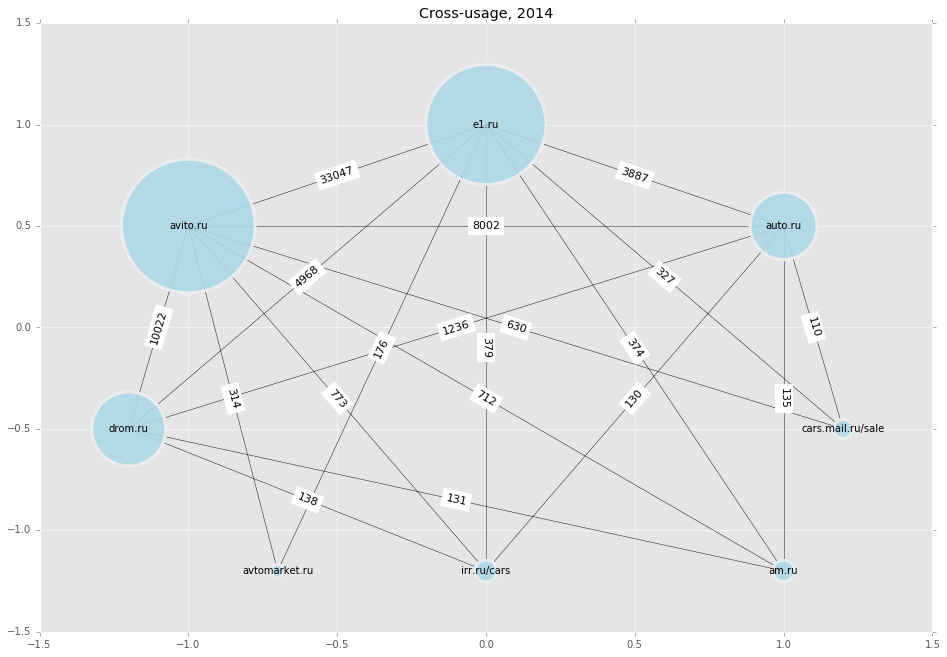

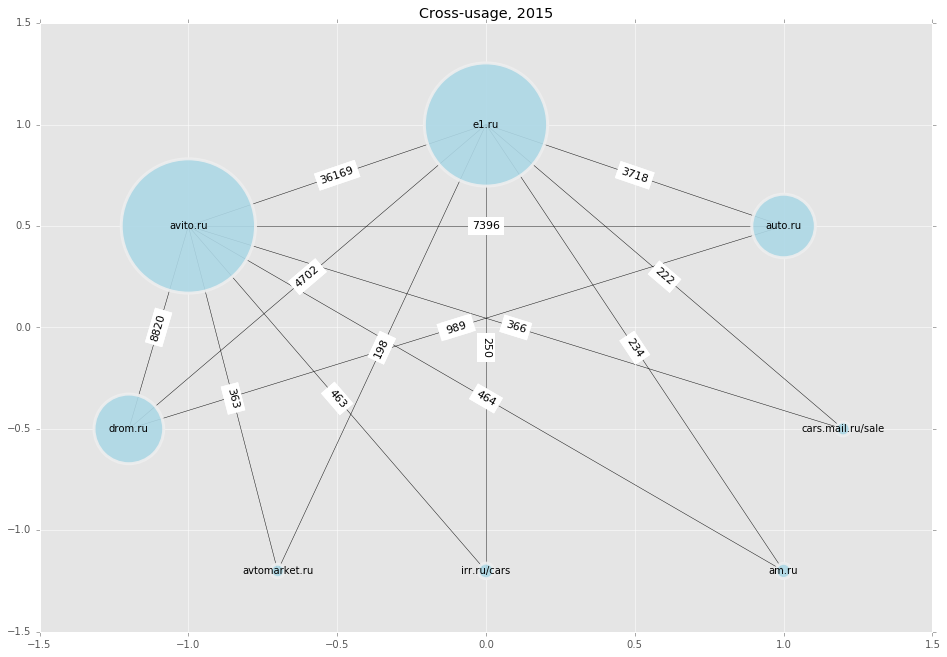

In [18]:
data_for_graph = [(crs_usage_2014, in_moves_2014), (crs_usage_2015, in_moves_2015)]
coord = {"e1.ru": (0, 1), "cars.mail.ru/sale": (1.2, -0.5), "avito.ru": (-1., 0.5), 
         "drom.ru": (-1.2, -0.5), "auto.ru": (1, 0.5), "avtomarket.ru": (-0.7, -1.2), 
         "irr.ru/cars": (0., -1.2), "am.ru": (1, -1.2)}

for data in data_for_graph:
    G = nx.Graph()
    G.add_nodes_from(data[1].keys())
    for edge in data[0].keys():
        G.add_edge(edge[0], edge[1], moves = data[0][edge])
    
    plt.figure(figsize=(16,24))
    plt.subplot(2, 1, 1 + data_for_graph.index(data))
    plt.title("Cross-usage, " + str(2014 + data_for_graph.index(data)))
    nx.draw_networkx(G, pos = coord, 
                     node_size = np.array([data[1][value] for value in G.nodes()]) / 3, 
                     node_color = 'lightblue',
                     alpha = 0.9,
                     linewidths = 3, 
                     width = 0.5, 
                     font_size = 10)

    nx.draw_networkx_edge_labels(G, pos = coord, 
                                 alpha = 1, 
                                 edge_labels = data[0], 
                                 font_size = 11, 
                                 bbox = dict(facecolor='white', edgecolor='none'))

#### The graph is useful visualization to track dynamics of cross-usage, for example:
* "irr.ru/cars", "cars.mail.ru/sale" and "am.ru" became less connected with the other websites in 2015 